In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
plt.style.use('science')
from pypeit.utils import calc_ivar

import warnings
warnings.filterwarnings("ignore")

In [2]:
def ivarsmooth(flux, ivar, window):
    nflux = (flux.shape)[0]
    halfwindow = int(np.floor((np.round(window) - 1)/2))
    shiftarr = np.zeros((nflux, 2*halfwindow + 1))
    shiftivar = np.zeros((nflux, 2*halfwindow + 1))
    shiftindex = np.zeros((nflux, 2*halfwindow + 1))
    indexarr = np.arange(nflux)
    indnorm = np.outer(indexarr,(np.zeros(2 *halfwindow + 1) + 1))
    for i in np.arange(-halfwindow,halfwindow + 1,dtype=int):
        shiftarr[:,i+halfwindow] = np.roll(flux,i)
        shiftivar[:, i+halfwindow] = np.roll(ivar, i)
        shiftindex[:, i+halfwindow] = np.roll(indexarr, i)
    wh = (np.abs(shiftindex - indnorm) > (halfwindow+1))
    shiftivar[wh]=0.0
    outivar = np.sum(shiftivar,axis=1)
    nzero, = np.where(outivar > 0.0)
    zeroct=len(nzero)
    smoothflux = np.sum(shiftarr * shiftivar, axis=1)
    if(zeroct > 0):
        smoothflux[nzero] = smoothflux[nzero]/outivar[nzero]
    else:
        smoothflux = np.roll(flux, 2*halfwindow + 1)

    return (smoothflux, outivar)

In [3]:
def plot(name_list, fits_list, idx_list, ylim_list):
    num = len(fits_list)
    fig, axs = plt.subplots(num, 1, figsize=(10,3*num))
    if num == 1:
        axs = [axs]
    for idx, ax in enumerate(axs):
        hdul = fits.open(fits_list[idx])
        output = Table(hdul[idx_list[idx]].data)
        try:
            flux = np.array(output['OPT_FLAM'])
            flux_ivar = np.array(output['OPT_FLAM_IVAR'])
            flux_err = 1 / np.sqrt(flux_ivar)
            wave = np.array(output['OPT_WAVE'])
        except KeyError:
            flux = np.array(output['flux'])
            flux_ivar = np.array(output['ivar'])
            flux_err = 1 / np.sqrt(flux_ivar)
            wave = np.array(output['wave'])
            
        flux_sm, flux_ivar_sm = ivarsmooth(flux, flux_ivar, 3)

        ax.plot(wave[wave>5000], flux_sm[wave>5000], label=name_list[idx], color="black", lw=1.5)
        ax.plot(wave[wave>5000], calc_ivar(flux_ivar_sm)[wave>5000], 
                lw=1, color="red", alpha=0.6)
        ax.set_xlabel(r"wavelength ($\AA$)", fontsize=15)
        ax.set_ylabel(r"f$_{\lambda}$ ($10^{-17}$ ergs$^{-1}$cm$^{-2}\AA^{-1}$)", fontsize=15)
        # ax.set_title("J0847+0139, window=3", fontsize=20)
        ax.set_xlim(7300,9600)
        ax.set_ylim(ylim_list[idx][0], ylim_list[idx][1])
        ax.legend(loc="upper left")
    fig.tight_layout()
    return fig, axs

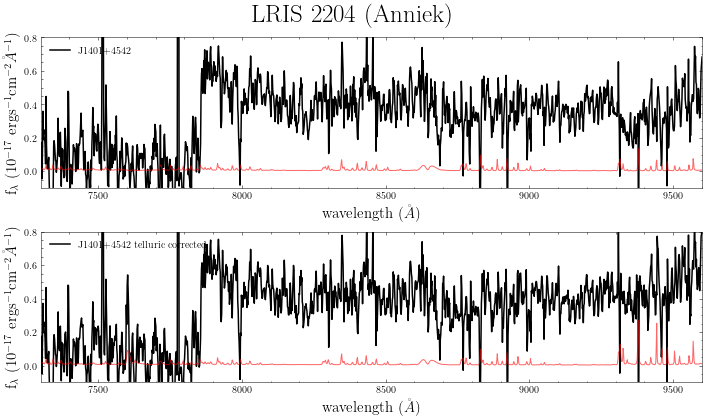

In [5]:
name_list = ["J1401+4542", "J1401+4542 telluric corrected"]
fits_list = ["all/Science/spec1d_r220423_00100-J1401+4542_OFF_LRISr_20220423T131547.837.fits",
             "all/J1401+4542/J1401+4542_coadd_tellcorr.fits"]
idx_list = [2, 1]
ylim_list = [(-0.1,0.8), (-0.1,0.8)]
fig, axs = plot(name_list, fits_list, idx_list, ylim_list)
fig.suptitle("LRIS 2204 (Anniek)", fontsize=25)
fig.subplots_adjust(top=0.9)

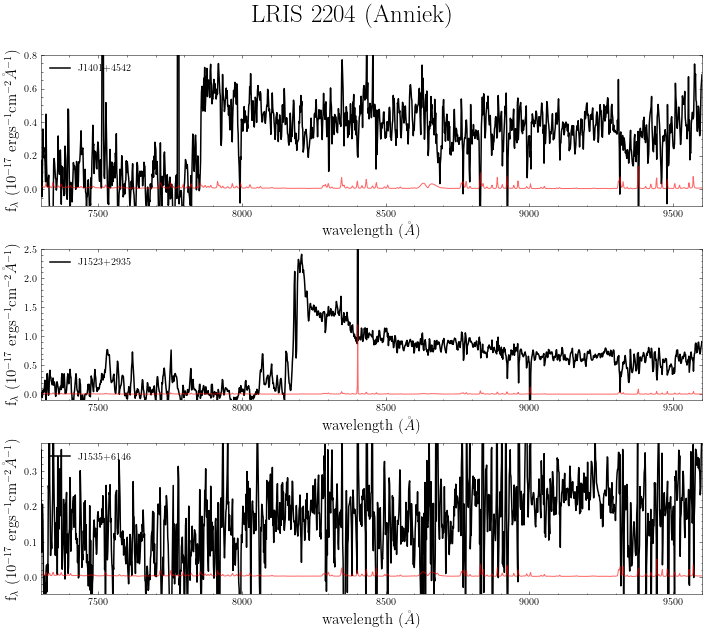

In [9]:
name_list = ["J1401+4542", "J1523+2935", "J1535+6146"]
fits_list = ["all/Science/spec1d_r220423_00100-J1401+4542_OFF_LRISr_20220423T131547.837.fits",
             "all/Science/spec1d_r220423_00084-J1523+2935_OFF_LRISr_20220423T113251.619.fits",
             "all/J1535+6146/J1535+6146_coadd.fits"
             ]
idx_list = [2, 1, 1]
ylim_list = [(-0.1,0.8), (-0.1,2.5), (-0.05,0.38)]
fig, axs = plot(name_list, fits_list, idx_list, ylim_list)
fig.suptitle("LRIS 2204 (Anniek)", fontsize=25)
fig.subplots_adjust(top=0.9)
plt.savefig("LRIS_2204_anniek.pdf")

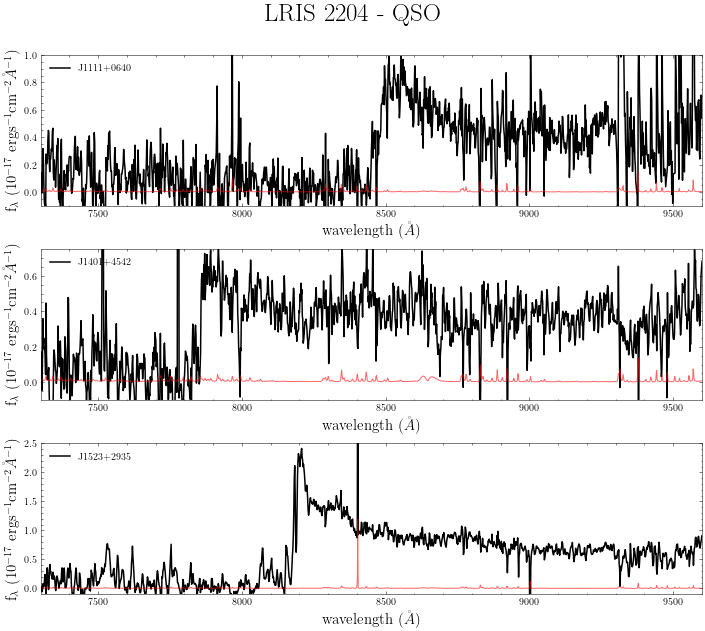

In [10]:
name_list = ["J1111+0640", "J1401+4542", "J1523+2935"]
fits_list = ["all/J1111+0640/J1111+0640_coadd.fits",
             "all/Science/spec1d_r220423_00100-J1401+4542_OFF_LRISr_20220423T131547.837.fits",
             "all/Science/spec1d_r220423_00084-J1523+2935_OFF_LRISr_20220423T113251.619.fits",
             ]
idx_list = [1, 2, 1]
ylim_list = [(-0.1,1.), (-0.1,0.75), (-0.1,2.5)]
fig, axs = plot(name_list, fits_list, idx_list, ylim_list)
fig.suptitle("LRIS 2204 - QSO", fontsize=25)
fig.subplots_adjust(top=0.9)
plt.savefig("LRIS_2204_qso.pdf")

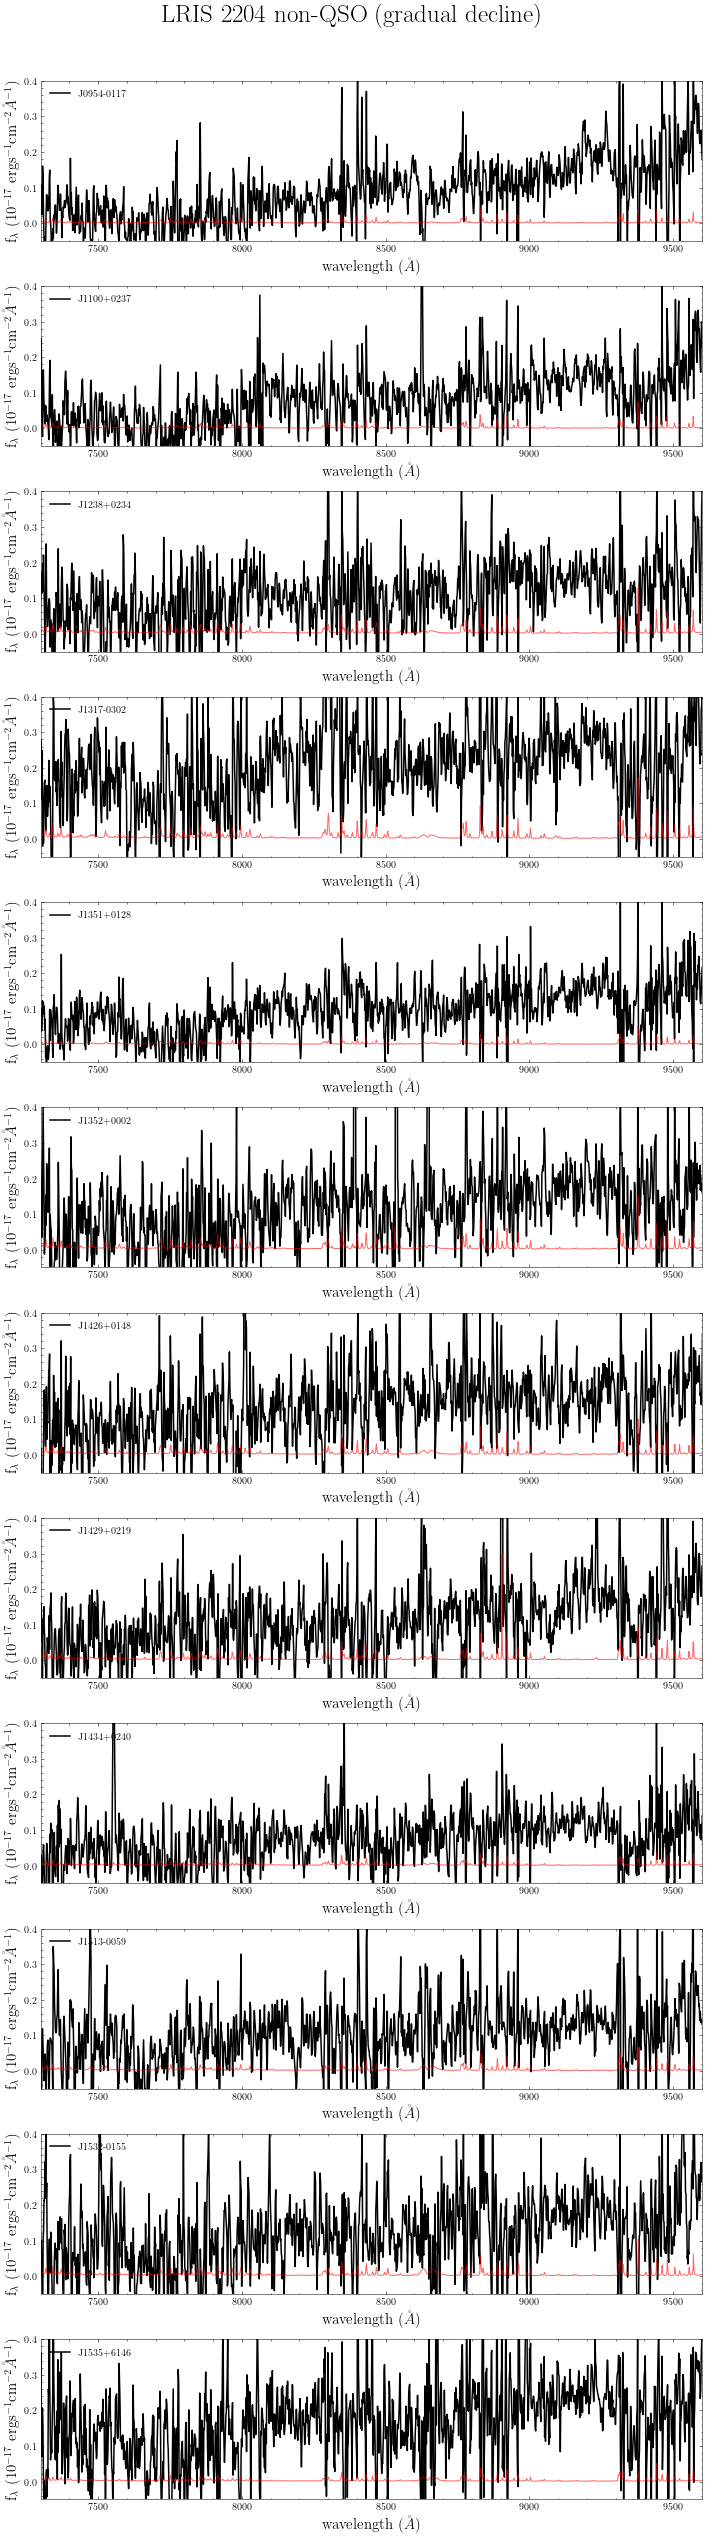

In [11]:
name_list = ["J0954-0117", "J1100+0237", "J1238+0234", "J1317-0302", "J1351+0128", "J1352+0002", 
             "J1426+0148", "J1429+0219", "J1434+0240", "J1513-0059", "J1532-0155", "J1535+6146"]
fits_list = ["all/J0954-0117/J0954-0117_coadd.fits",
             "all/J1100+0237/J1100+0237_coadd.fits",
             "all/Science/spec1d_r220423_00053-J1238+0234_OFF_LRISr_20220423T084038.957.fits",
             "all/Science/spec1d_r220423_00058-J1317-0302_OFF_LRISr_20220423T091629.107.fits",
             "all/J1351+0128/J1351+0128_coadd.fits",
             "all/Science/spec1d_r220423_00067-J1352+0002_OFF_LRISr_20220423T095946.032.fits",
             "all/Science/spec1d_r220423_00075-J1426+0148_OFF_LRISr_20220423T104904.109.fits",
             "all/Science/spec1d_r220423_00077-J1429+0219_OFF_LRISr_20220423T105741.213.fits",
             "all/J1434+0240/J1434+0240_coadd.fits",
             "all/J1513-0059/J1513-0059_coadd.fits",
             "all/J1532-0155/J1532-0155_coadd.fits",
             "all/J1535+6146/J1535+6146_coadd.fits"]
idx_list = [1, 1, 3, 4, 1, 4, 
            1, 2, 1, 1, 1, 1]
ylim_list = [(-0.05,0.35), (-0.05,0.35), (-0.05,0.35), (0,0.4), (-0.05,0.3), (-0.05,0.3), 
             (0,0.3), (-0.05, 0.3), (-0.05,0.25), (-0.05,0.25), (-0.1,0.35), (-0.05,0.38)]
ylim_list = [(-0.05, 0.4) for i in range(len(idx_list))]
fig, axs = plot(name_list, fits_list, idx_list, ylim_list)
fig.suptitle("LRIS 2204 non-QSO (gradual decline)", fontsize=25)
fig.subplots_adjust(top=0.95)
plt.savefig("LRIS_2204_nonqso_1.pdf")

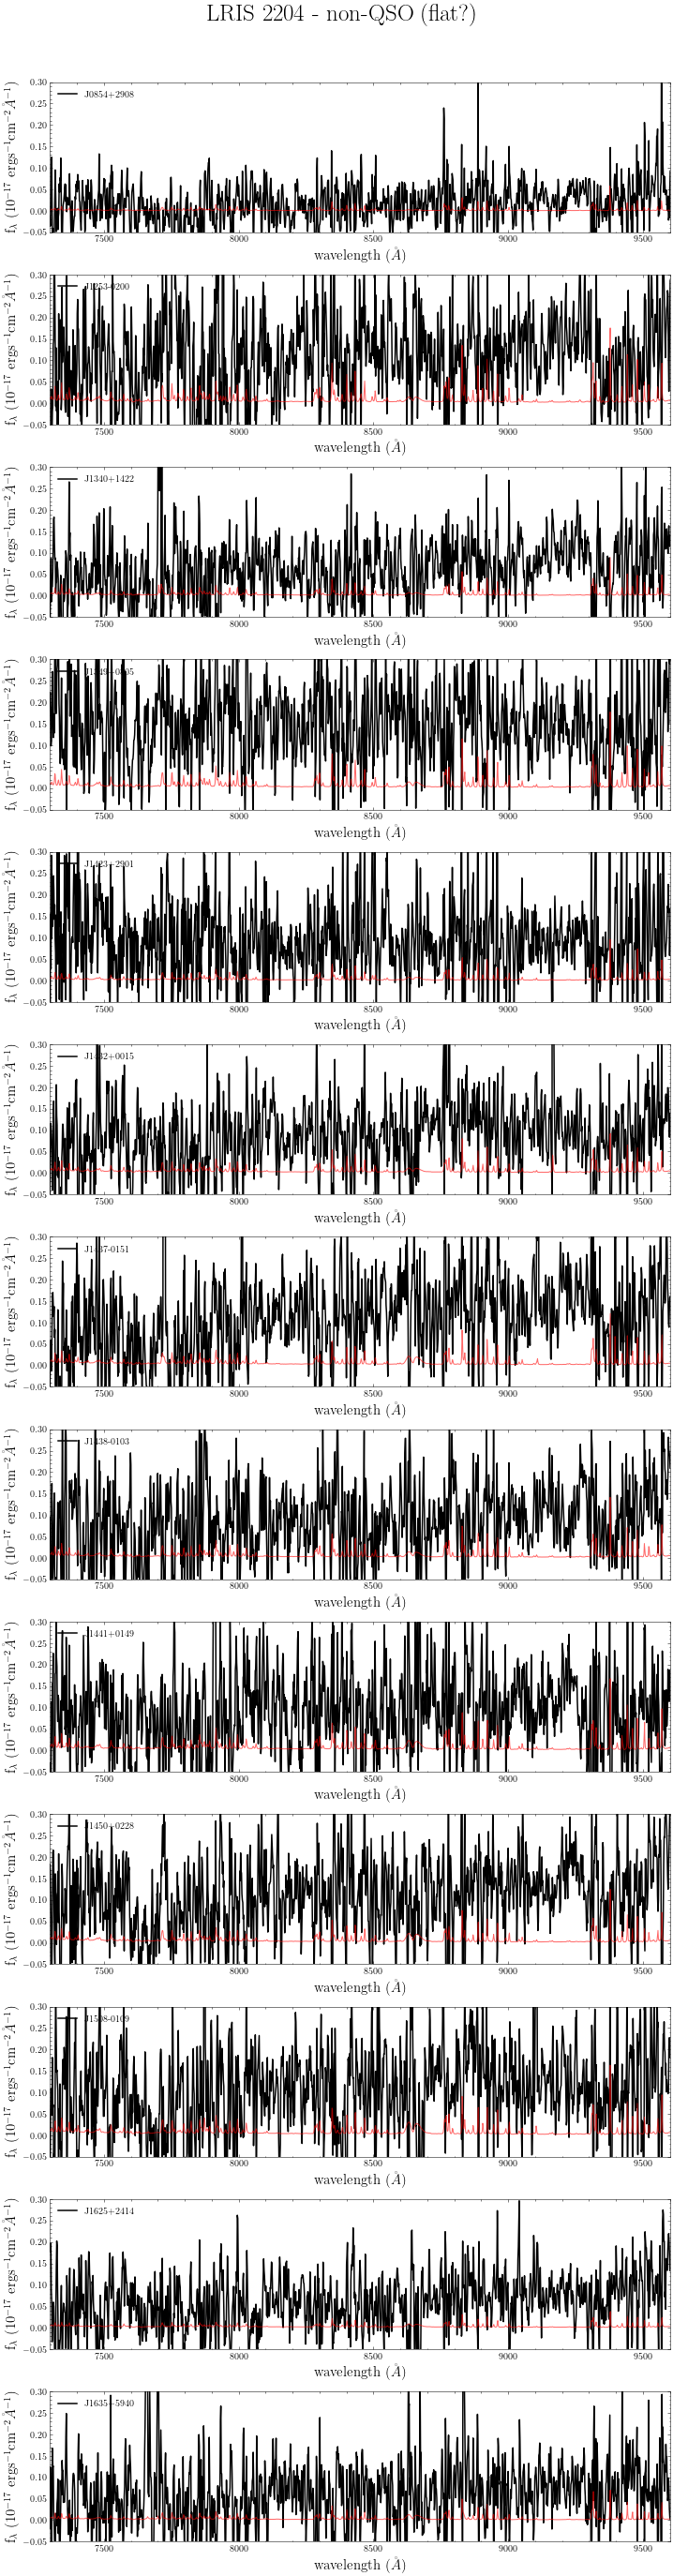

In [12]:
name_list = ["J0854+2908", "J1253-0200", "J1340+1422", "J1349+0805", "J1423+2901",
             "J1432+0015", "J1437-0151", "J1438-0103", "J1441+0149", "J1450+0228",
             "J1508-0109", "J1625+2414", "J1635+5940"]
fits_list = ["all/coadd2d/Science_coadd/spec1d_r220423-r220423-J0854+2908.fits",
             "all/Science/spec1d_r220423_00056-J1253-0200_OFF_LRISr_20220423T090213.315.fits",
             "all/Science/spec1d_r220423_00061-J1340+1422_OFF_LRISr_20220423T092651.360.fits",
             "all/Science/spec1d_r220423_00063-J1349+0805_OFF_LRISr_20220423T093653.136.fits",
             "all/J1423+2901/J1423+2901_coadd.fits",
             "all/Science/spec1d_r220423_00079-J1432+0015_OFF_LRISr_20220423T110506.000.fits",
             "all/Science/spec1d_r220423_00096-J1437-0151_OFF_LRISr_20220423T124636.509.fits",
             "all/Science/spec1d_r220423_00073-J1438-0103_OFF_LRISr_20220423T104021.821.fits",
             "all/J1441+0149/J1441+0149_coadd.fits",
             "all/Science/spec1d_r220423_00098-J1450+0228_OFF_LRISr_20220423T125503.418.fits",
             "all/Science/spec1d_r220423_00105-J1508-0109_OFF_LRISr_20220423T135536.710.fits",
             "all/J1625+2414/J1625+2414_coadd.fits",
             "all/J1635+5940/J1635+5940_coadd.fits"]
idx_list = [3, 1, 1, 1, 1,
            3, 2, 2, 1, 2,
            4, 1, 1]
ylim_list = [(-0.05,0.1), (-0.05,0.35), (-0.02,0.2), (-0.02,0.35), (0,0.25),
             (-0.05,0.25), (-0.02,0.3), (-0.05,0.3), (-0.05,0.25), (-0.05,0.3),
             (-0.05,0.3), (-0.05,0.2), (-0.05,0.2)]
ylim_list = [(-0.05, 0.3) for i in range(len(idx_list))]
fig, axs = plot(name_list, fits_list, idx_list, ylim_list)
fig.suptitle("LRIS 2204 - non-QSO (flat?)", fontsize=25)
fig.subplots_adjust(top=0.95)
plt.savefig("LRIS_2204_nonqso_2.pdf")

/var/folders/9f/nf42vsf97rb33r752j99smfw0000gn/T/ipykernel_67061/2498317299.py:5: RuntimeWarning: divide by zero encountered in true_divide
  flux_err = 1 / np.sqrt(flux_ivar)
/var/folders/9f/nf42vsf97rb33r752j99smfw0000gn/T/ipykernel_67061/2498317299.py:11: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(wave[wave>7000], (1/np.sqrt(flux_ivar_sm)-np.min(1/np.sqrt(flux_ivar_sm))+0.05)[wave>7000], lw=0.5, color="grey")


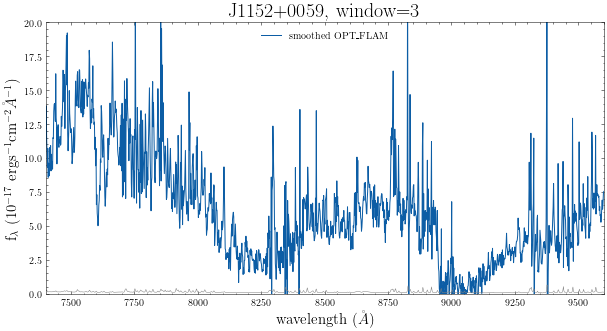

In [26]:
hdul = fits.open("all/Science/spec1d_r220423_00051-J1152+0059_OFF_LRISr_20220423T083203.840.fits")
output = Table(hdul[2].data)
flux = np.array(output['OPT_FLAM'])
flux_ivar = np.array(output['OPT_FLAM_IVAR'])
flux_err = 1 / np.sqrt(flux_ivar)
wave = np.array(output['OPT_WAVE'])
flux_sm, flux_ivar_sm = ivarsmooth(flux, flux_ivar, 3)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(wave[wave>7000], flux_sm[wave>7000], label=r"smoothed $\rm OPT\_FLAM$")
ax.plot(wave[wave>7000], (1/np.sqrt(flux_ivar_sm)-np.min(1/np.sqrt(flux_ivar_sm))+0.05)[wave>7000], lw=0.5, color="grey")
ax.set_xlabel(r"wavelength ($\AA$)", fontsize=15)
ax.set_ylabel(r"f$_{\lambda}$ ($10^{-17}$ ergs$^{-1}$cm$^{-2}\AA^{-1}$)", fontsize=15)
ax.set_title("J1152+0059, window=3", fontsize=20)
ax.set_xlim(7400, 9600)
ax.set_ylim(-0.05, 20)
ax.legend()